In [1]:
import itertools
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from node_SI1I2S import EpidemicGraph, TransitionDiagram
%matplotlib inline

In [15]:
def average_n(n, r, paramet, csv, nstep=300):
    listt = []
    timingg = []
    print(N)
    for i in range(n):
        a = EpidemicGraph(N,r,paramet,I1=4,I2=4, grid_size=[30,30])
        a.load_csv(csv, I1=4, I2=4)
        timing = a.run(nstep)
        listt.append(a.hist2pandas())
        timingg.append(np.array(timing))
        print(i+1, end='\r')
#     print()
    df = listt[0]
    del listt[0]
    for v in listt:
        df += v
    df /= n  # average population
    b = []
    for tm in timingg:
        b.append(tm - tm[0])
    c = np.array(b)  
    return df, c.mean(axis=0) # average time

def normalize_str(string):
    string = string.replace('{','('); 
    string = string.replace('}',')'); 
    string = string.replace(':','')
    return string

WS_100.csv {'betta_1': 0.1, 'gamma_1': 0.3, 'betta_2': 0.1, 'gamma_2': 0.3} 100
100
WS_100.csv {'betta_1': 0.7, 'gamma_1': 0.9, 'betta_2': 0.7, 'gamma_2': 0.9} 100
100
WS_100.csv {'betta_1': 0.5, 'gamma_1': 0.2, 'betta_2': 0.5, 'gamma_2': 0.2} 100
100
WS_1024.csv {'betta_1': 0.1, 'gamma_1': 0.3, 'betta_2': 0.1, 'gamma_2': 0.3} 1024
1024
WS_1024.csv {'betta_1': 0.7, 'gamma_1': 0.9, 'betta_2': 0.7, 'gamma_2': 0.9} 1024
1024
WS_1024.csv {'betta_1': 0.5, 'gamma_1': 0.2, 'betta_2': 0.5, 'gamma_2': 0.2} 1024
1024


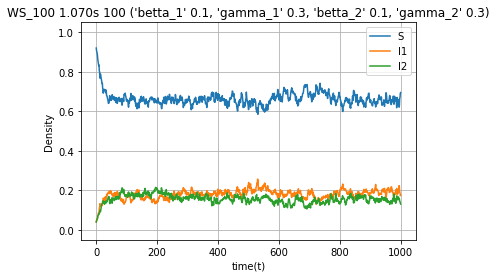

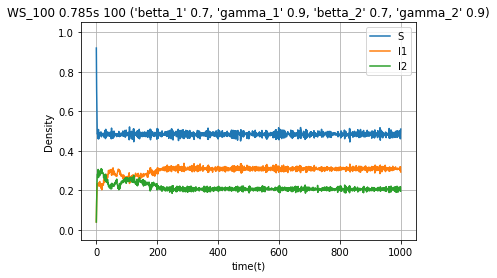

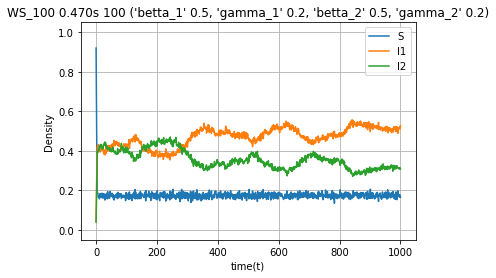

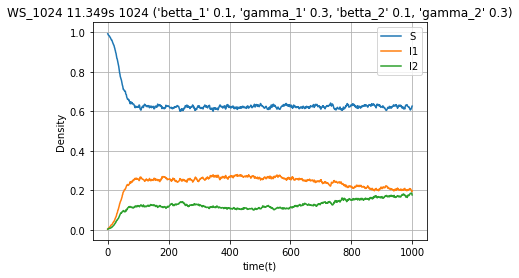

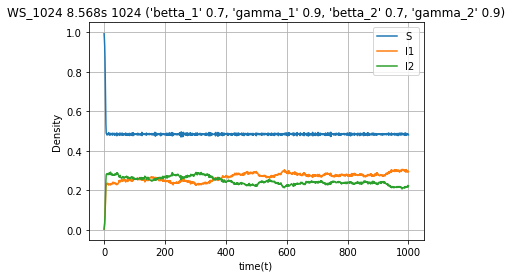

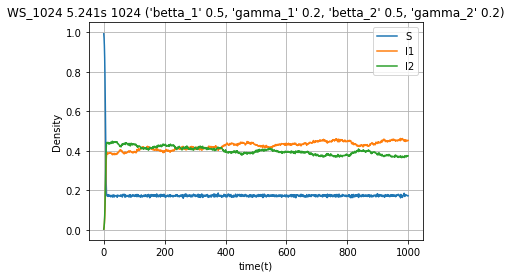

In [18]:
# csv_list = ['BA_100.csv', 'ER_100.csv', 'WS_100.csv', 
#             'BA_256.csv', 'ER_256.csv', 'WS_256.csv',
#             'BA_1024.csv', 'ER_1024.csv', 'WS_1024.csv']
# csv_list = ['BA_100.csv', 'BA_256.csv', 'BA_1024.csv']
csv_list = ['WS_100.csv', 'WS_1024.csv']
param_list = [{'betta_1': 0.1, 'gamma_1': 0.3, 'betta_2': 0.1, 'gamma_2': 0.3},
              {'betta_1': 0.7, 'gamma_1': 0.9, 'betta_2': 0.7, 'gamma_2': 0.9},
              {'betta_1': 0.5, 'gamma_1': 0.2, 'betta_2': 0.5, 'gamma_2': 0.2}]
r = 0 # dummy, because adjacency matrix is loaded directly from file
for csv, paramet in itertools.product(csv_list, param_list):
    N = int(csv.split('_')[-1].split('.')[0])
    print(csv, paramet, N)
    population_N, tm = average_n(10, r, paramet, csv, nstep=1000)
    population_1 = population_N/N
    f = population_1.plot(grid=True)
    plot_title = '{} {:.3f}s {} {}'.format(csv.split('.')[0], tm[-1]-tm[0], N, paramet)
    plot_title = normalize_str(plot_title)
    pdf_title = 'fig/{} {}.pdf'.format(csv.split('.')[0], paramet)
    pdf_title = normalize_str(pdf_title)
    plt.title(plot_title)
    plt.xlabel('time(t)')
    plt.ylabel('Density')
#     plt.xlim([0, 100])
    plt.ylim([-0.05,1.05])
    f.get_figure().savefig(pdf_title, bbox_inches='tight')